In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/GOKUL/Downloads/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:>

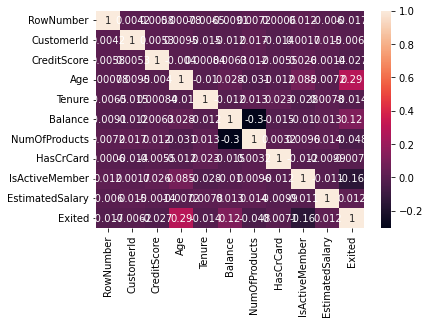

In [4]:
sns.heatmap(data.corr(),annot=True)

In [5]:
x = data.iloc[:,[3,8]] ## For selecting multiple indexes in a column which are far apart
x

,CreditScore,Balance
0,619,0.00
1,608,83807.86
2,502,159660.80
3,699,0.00
4,850,125510.82
...,...,...
9995,771,0.00
9996,516,57369.61
9997,709,0.00
9998,772,75075.31


In [6]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 10,min_samples = 100,metric = "euclidean")
model = db.fit(x)

In [7]:
labels = model.labels_

In [22]:
labels

array([ 0, -1, -1, ...,  0, -1, -1], dtype=int64)

In [25]:
d = pd.DataFrame(labels)
d

,0
0,0
1,-1
2,-1
3,0
4,-1
...,...
9995,0
9996,-1
9997,0
9998,-1


In [27]:
d.value_counts()

-1    6591
 0    3284
 1     125
dtype: int64

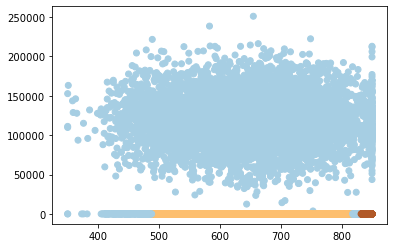

In [28]:
means = db.fit_predict(x)
plt.scatter(x["CreditScore"],x["Balance"],c = means,cmap="Paired")


In [29]:
n_clusters = len(set(labels))-(1 if -1 in labels else 0)  ## number of clusters in labels, ignoring noise if present
n_noise = list(labels).count(-1)
print ("number of cluster: ",n_clusters)
print ("number of noises: ",n_noise)

number of cluster:  2
number of noises:  6591


In [31]:
data["cluster"] = labels
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cluster
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,-1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,-1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,-1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,-1


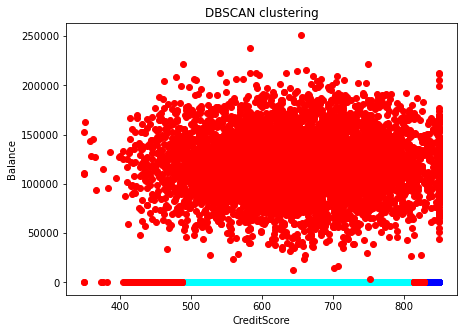

In [32]:
plt.figure(figsize = (7,5))

df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == -1]

plt.scatter(df1["CreditScore"],df1["Balance"],color = "cyan",label="cluster0")
plt.scatter(df2["CreditScore"],df2["Balance"],color = "blue",label="cluster1")
plt.scatter(df3["CreditScore"],df3["Balance"],color = "red",label="cluster1")


plt.xlabel("CreditScore")
plt.ylabel("Balance")
plt.title("DBSCAN clustering")
plt.show()

In [60]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cluster
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.63,0,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,0
13,14,15691483,Chin,549,France,Female,25,5,0.0,2,0,0,190857.79,0,0
14,15,15600882,Scott,635,Spain,Female,35,7,0.0,2,1,1,65951.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,15589329,Pirozzi,775,France,Male,30,4,0.0,2,1,0,49337.84,0,0
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.0,2,0,0,167773.55,0,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.0,2,1,0,96270.64,0,0


In [61]:
df2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cluster
24,25,15625047,Yen,846,France,Female,38,5,0.0,1,1,1,187616.16,0,1
38,39,15717426,Armstrong,850,France,Male,36,7,0.0,1,1,1,40812.90,0,1
223,224,15733247,Stevenson,850,France,Male,33,10,0.0,1,1,0,4861.72,1,1
345,346,15763859,Brown,840,France,Female,43,7,0.0,2,1,0,90908.95,0,1
411,412,15760431,Pino,850,France,Male,38,1,0.0,2,1,1,80006.65,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9581,9582,15709256,Glover,850,France,Female,28,9,0.0,2,1,1,164864.67,0,1
9650,9651,15646168,Ifeatu,834,Spain,Male,33,5,0.0,2,1,0,66285.18,0,1
9654,9655,15773098,Ch'in,834,Spain,Male,34,5,0.0,2,0,0,53437.10,0,1
9835,9836,15616172,Ubanwa,838,France,Male,31,2,0.0,2,1,0,8222.96,0,1
